<a href="https://colab.research.google.com/github/Ecevangelista/422_Classification_Bankruptcy/blob/main/Assignment_5_Bankruptcy_2_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import statistics
import numpy as np
from numpy import arange, random
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import norm,uniform, reciprocal
from sklearn.metrics import accuracy_score, confusion_matrix, PrecisionRecallDisplay, f1_score, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from yellowbrick.model_selection import FeatureImportances 
import plotly.express as px
from imblearn.over_sampling import SMOTE
from collections import Counter

# Ingest

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "drive/MyDrive/422NU/bankruptcy_data.csv"
df = pd.read_csv(path)

In [4]:
df.shape

(6819, 96)

In [5]:
df1 = df.copy(deep = True)

# EDA

In [6]:
#split df1 into test and train
Xran = df1.drop(columns = ['Bankrupt?'])
yran = df1['Bankrupt?']


X_trainran, X_testran, y_trainran, y_testran = train_test_split(Xran,yran, test_size = 0.2, random_state = 10)

Rebalanced Sample with SMOTE to increase sample availability of Bankrupt occurrences since previous EDA showed a distribution of 97% not bankrupt to 3% bankrupt in the dataset.

In [7]:
oversample = SMOTE()
X, y = oversample.fit_resample(X_trainran, y_trainran)

In [8]:
counter = Counter(y)
print(counter)

Counter({0: 5286, 1: 5286})


# Random Forrest Classifier with Tuning Hyperparameters

In [24]:
#Baseline Random Forest

random.seed(1234)
clfran2=RandomForestClassifier(n_estimators=100, random_state = random.seed(1234))

clfran2.fit(X,y)

RandomForestClassifier()

In [25]:
y_predran2=clfran2.predict(X_testran)

In [26]:
#Classification Report

print(classification_report(y_testran, y_predran2))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1313
           1       0.47      0.65      0.55        51

    accuracy                           0.96      1364
   macro avg       0.73      0.81      0.76      1364
weighted avg       0.97      0.96      0.96      1364



In [12]:
#Create grid of parameters to try during tuning

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth
               }

In [30]:
#New RandomSearchCV with rebalanced sample

random.seed(1234)

clfrantun4=RandomForestClassifier()

rf_random4 = RandomizedSearchCV(estimator = clfrantun4, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=3, random_state=random.seed(1234), n_jobs = -1)

searchran = rf_random4.fit(X,y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [31]:
searchran.best_params_

{'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 300}

In [32]:
#Classifier Tuned with max_features = sqrt

random.seed(1234)
clfrantun4=RandomForestClassifier(max_depth = 30, n_estimators=300, max_features = 'sqrt', random_state = random.seed(1234) )

clfrantun4.fit(X,y)

RandomForestClassifier(max_depth=30, max_features='sqrt', n_estimators=300)

In [33]:
y_predrantun4=clfrantun4.predict(X_testran)

In [34]:
#Classification Report

print(classification_report(y_testran, y_predrantun4))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1313
           1       0.48      0.65      0.55        51

    accuracy                           0.96      1364
   macro avg       0.73      0.81      0.76      1364
weighted avg       0.97      0.96      0.96      1364



In [27]:
#After a bit more tuning, I was able to increase the F1 Score and Precision

#Optimal Random Trees Classifier Tuned with n_estimators = 400

random.seed(1234)
clfrantun5=RandomForestClassifier(n_estimators=400, max_features = 'sqrt', random_state = random.seed(1234) )

clfrantun5.fit(X,y)

RandomForestClassifier(max_features='sqrt', n_estimators=400)

In [28]:
y_predrantun5=clfrantun5.predict(X_testran)

In [29]:
#Classification Report

print(classification_report(y_testran, y_predrantun5))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1313
           1       0.49      0.65      0.55        51

    accuracy                           0.96      1364
   macro avg       0.74      0.81      0.77      1364
weighted avg       0.97      0.96      0.96      1364



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


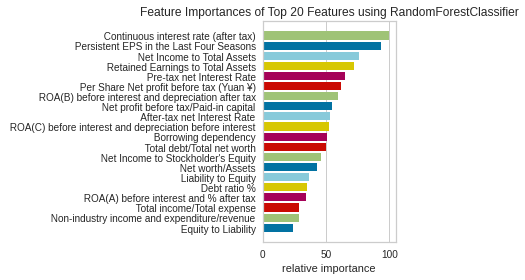

In [21]:
#Looking at Feature Importances RANDOM FOREST TUNED 5

vizrantun5 = FeatureImportances(clfrantun5, topn = 20)
vizrantun5.fit(X, y)
vizrantun5.show()

# Gradient Boosted Trees

In [35]:
#Baseline Gradient Boosting Classifier model

gb1 = GradientBoostingClassifier(n_iter_no_change = 10, random_state = 1)

gb1.fit(X,y)

GradientBoostingClassifier(n_iter_no_change=10, random_state=1)

In [36]:
y_predgb1=gb1.predict(X_testran)

In [37]:
#Classification Report

print(classification_report(y_testran, y_predgb1))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1313
           1       0.33      0.71      0.45        51

    accuracy                           0.94      1364
   macro avg       0.66      0.83      0.71      1364
weighted avg       0.96      0.94      0.95      1364



The baseline Gradient Gradient Boosted Classifier did not achieve a higher F1 score than the Random Forest Classifier.

In [38]:
#Randomized Search CV Grid

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 8, num = 7)]
max_depth.append(None)
learning_rate = [x for x in np.linspace(start = 0.05, stop = .2, num = 4)]


# Create the random grid
random_gridgb3 = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'learning_rate': learning_rate
               }

print(random_gridgb3)

{'n_estimators': [100, 200, 300, 400, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, None], 'learning_rate': [0.05, 0.1, 0.15000000000000002, 0.2]}


In [ ]:
#Randomized Search CV to tune Gradient Boosting hyperparameters


gbtun3=GradientBoostingClassifier(n_iter_no_change = 10)

gb_random3 = RandomizedSearchCV(estimator = gbtun3, param_distributions = random_gridgb3, n_iter = 20, cv = 3, verbose=3, random_state=1, n_jobs = -1)

searchrangb = gb_random3.fit(X,y)

In [ ]:
searchrangb.best_params_

In [39]:
#After a bit more tuning, I was able to increase the F1 Score and Precision

#Optimal Gradient Boosted Trees Classifier Tuned with n_estimators = 200

#GB5 with Tuned Params

gb5 = GradientBoostingClassifier(learning_rate = 0.2, max_depth = 6, max_features = 'sqrt', n_estimators = 200, random_state = 1)

gb5.fit(X,y)

GradientBoostingClassifier(learning_rate=0.2, max_depth=6, max_features='sqrt',
                           n_estimators=200, random_state=1)

In [40]:
y_predgb5=gb5.predict(X_testran)

In [41]:
#Classification Report GB5

print(classification_report(y_testran, y_predgb5))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1313
           1       0.65      0.63      0.64        51

    accuracy                           0.97      1364
   macro avg       0.82      0.81      0.81      1364
weighted avg       0.97      0.97      0.97      1364



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"


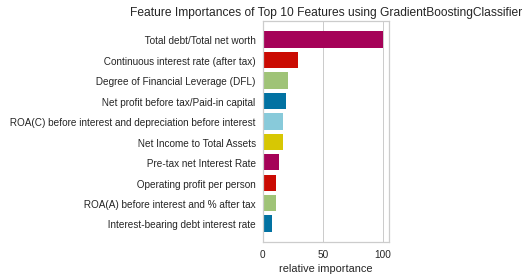

In [42]:
#Looking at Feature Importances GB5

vizrantunGB = FeatureImportances(gb5, topn = 10)
vizrantunGB.fit(X, y)
vizrantunGB.show()

# Extra Trees Classifier

In [47]:
#Baseline Extra Trees Classifier

random.seed(1234)
etree = ExtraTreesClassifier(n_estimators = 100, random_state = random.seed(1234))

etree.fit(X,y)

ExtraTreesClassifier()

In [48]:
y_predet1=etree.predict(X_testran)

In [49]:
#Classification Report Extra Trees1

print(classification_report(y_testran, y_predet1))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1313
           1       0.48      0.61      0.54        51

    accuracy                           0.96      1364
   macro avg       0.73      0.79      0.76      1364
weighted avg       0.97      0.96      0.96      1364



In [ ]:
#Randomized Search CV with Extra Trees to tune Hyperparameters

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 4)]
#Criterion
criterion = ['gini', 'entropy']
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 8, num = 7)]
max_depth.append(None)
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)]



# Create the random grid
random_gridet1 = {'n_estimators': n_estimators,
                  'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split
               }

print(random_gridet1)

In [ ]:
#Randomized Search CV to tune Extra Trees hyperparameters


ettun1=ExtraTreesClassifier()

et_random = RandomizedSearchCV(estimator = ettun1, param_distributions = random_gridet1, n_iter = 20, cv = 3, verbose=3, random_state=1, n_jobs = -1)

searchranet = et_random.fit(X,y)

In [ ]:
searchranet.best_params_

In [50]:
#Extra Trees Tuned 2

etree2 = ExtraTreesClassifier(n_estimators = 150, criterion = 'entropy', max_depth = None, min_samples_split = 2, max_features = 'sqrt', random_state = 1)

etree2.fit(X,y)

ExtraTreesClassifier(criterion='entropy', max_features='sqrt', n_estimators=150,
                     random_state=1)

In [51]:
y_predet2=etree2.predict(X_testran)

In [52]:
#Classification Report Extra Trees2

print(classification_report(y_testran, y_predet2))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1313
           1       0.51      0.65      0.57        51

    accuracy                           0.96      1364
   macro avg       0.75      0.81      0.77      1364
weighted avg       0.97      0.96      0.97      1364



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  "X does not have valid feature names, but"


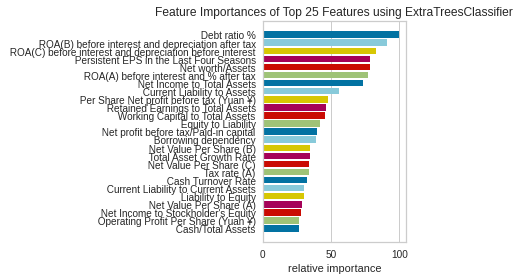

In [53]:
#Looking at Feature Importances Extra Trees 2

vizrantunET = FeatureImportances(etree2, topn = 25)
vizrantunET.fit(X, y)

#vizrantunET.ax.set_yticks(y,fontsize=9)

vizrantunET.show()